<a href="https://colab.research.google.com/github/hrithikpurwar/Sigmoids-Kodeathon-SkinDisease/blob/main/SkinPigment_Kodeathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

In [101]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Skin/hmnist_28_28_RGB.csv')

In [102]:
df.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,pixel0010,pixel0011,pixel0012,pixel0013,pixel0014,pixel0015,pixel0016,pixel0017,pixel0018,pixel0019,pixel0020,pixel0021,pixel0022,pixel0023,pixel0024,pixel0025,pixel0026,pixel0027,pixel0028,pixel0029,pixel0030,pixel0031,pixel0032,pixel0033,pixel0034,pixel0035,pixel0036,pixel0037,pixel0038,pixel0039,...,pixel2313,pixel2314,pixel2315,pixel2316,pixel2317,pixel2318,pixel2319,pixel2320,pixel2321,pixel2322,pixel2323,pixel2324,pixel2325,pixel2326,pixel2327,pixel2328,pixel2329,pixel2330,pixel2331,pixel2332,pixel2333,pixel2334,pixel2335,pixel2336,pixel2337,pixel2338,pixel2339,pixel2340,pixel2341,pixel2342,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,162,192,208,165,201,209,165,205,208,165,194,212,169,198,216,181,204,216,178,204,215,172,205,217,173,209,217,166,202,214,...,216,181,212,215,176,208,213,168,191,209,159,184,212,168,194,212,172,198,208,173,193,203,168,183,190,142,152,177,123,134,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,128,158,172,136,162,175,134,157,177,126,158,186,138,163,197,153,187,198,153,186,203,168,206,205,169,204,207,164,199,205,...,209,176,203,207,171,191,208,172,197,205,169,188,198,159,172,200,159,192,191,140,182,177,128,141,147,101,97,113,79,82,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,149,165,207,149,159,209,156,164,202,136,130,200,133,129,208,146,157,212,159,167,214,157,168,211,143,150,215,148,169,213,...,221,168,175,222,170,188,221,167,184,203,144,155,201,146,155,210,163,177,190,142,152,192,152,172,194,153,176,178,134,149,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,125,134,177,118,123,190,137,146,192,127,143,200,141,162,207,156,170,202,144,151,202,138,155,212,159,177,211,155,172,211,...,181,137,145,189,147,166,192,157,185,169,129,144,148,114,122,157,125,137,157,127,147,154,128,147,130,102,114,87,63,73,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,179,214,232,189,222,235,193,219,234,191,206,238,200,219,244,213,240,243,213,239,242,210,238,244,216,241,247,224,244,246,...,238,195,209,237,191,200,238,194,201,239,197,216,238,195,219,232,179,201,217,150,173,224,171,207,227,177,206,222,178,201,209,166,185,172,135,149,109,78,92,2


In [103]:
df.label.unique()

array([2, 4, 3, 6, 5, 1, 0])

In [104]:
df.isnull().sum()

pixel0000    0
pixel0001    0
pixel0002    0
pixel0003    0
pixel0004    0
            ..
pixel2348    0
pixel2349    0
pixel2350    0
pixel2351    0
label        0
Length: 2353, dtype: int64

In [150]:
Y = df.label.copy()
X = df.drop('label', axis=1).copy()

In [151]:
Y.head()

0    2
1    2
2    2
3    2
4    2
Name: label, dtype: int64

In [152]:
Y=pd.DataFrame(Y)

In [153]:
Y.head()

,label
0,2
1,2
2,2
3,2
4,2


In [111]:
X=pd.DataFrame(X)

In [112]:
X.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,pixel0010,pixel0011,pixel0012,pixel0013,pixel0014,pixel0015,pixel0016,pixel0017,pixel0018,pixel0019,pixel0020,pixel0021,pixel0022,pixel0023,pixel0024,pixel0025,pixel0026,pixel0027,pixel0028,pixel0029,pixel0030,pixel0031,pixel0032,pixel0033,pixel0034,pixel0035,pixel0036,pixel0037,pixel0038,pixel0039,...,pixel2312,pixel2313,pixel2314,pixel2315,pixel2316,pixel2317,pixel2318,pixel2319,pixel2320,pixel2321,pixel2322,pixel2323,pixel2324,pixel2325,pixel2326,pixel2327,pixel2328,pixel2329,pixel2330,pixel2331,pixel2332,pixel2333,pixel2334,pixel2335,pixel2336,pixel2337,pixel2338,pixel2339,pixel2340,pixel2341,pixel2342,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351
0,192,153,193,195,155,192,197,154,185,202,162,192,208,165,201,209,165,205,208,165,194,212,169,198,216,181,204,216,178,204,215,172,205,217,173,209,217,166,202,214,...,217,216,181,212,215,176,208,213,168,191,209,159,184,212,168,194,212,172,198,208,173,193,203,168,183,190,142,152,177,123,134,173,124,138,183,147,166,185,154,177
1,25,14,30,68,48,75,123,93,126,158,128,158,172,136,162,175,134,157,177,126,158,186,138,163,197,153,187,198,153,186,203,168,206,205,169,204,207,164,199,205,...,187,209,176,203,207,171,191,208,172,197,205,169,188,198,159,172,200,159,192,191,140,182,177,128,141,147,101,97,113,79,82,60,39,55,25,14,28,25,14,27
2,192,138,153,200,145,163,201,142,160,206,149,165,207,149,159,209,156,164,202,136,130,200,133,129,208,146,157,212,159,167,214,157,168,211,143,150,215,148,169,213,...,176,221,168,175,222,170,188,221,167,184,203,144,155,201,146,155,210,163,177,190,142,152,192,152,172,194,153,176,178,134,149,167,129,143,159,124,142,136,104,117
3,38,19,30,95,59,72,143,103,119,171,125,134,177,118,123,190,137,146,192,127,143,200,141,162,207,156,170,202,144,151,202,138,155,212,159,177,211,155,172,211,...,160,181,137,145,189,147,166,192,157,185,169,129,144,148,114,122,157,125,137,157,127,147,154,128,147,130,102,114,87,63,73,44,26,36,25,12,17,25,12,15
4,158,113,139,194,144,174,215,162,191,225,179,214,232,189,222,235,193,219,234,191,206,238,200,219,244,213,240,243,213,239,242,210,238,244,216,241,247,224,244,246,...,219,238,195,209,237,191,200,238,194,201,239,197,216,238,195,219,232,179,201,217,150,173,224,171,207,227,177,206,222,178,201,209,166,185,172,135,149,109,78,92


In [113]:
Y.value_counts()

label
4        6705
6        1113
2        1099
1         514
0         327
5         142
3         115
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


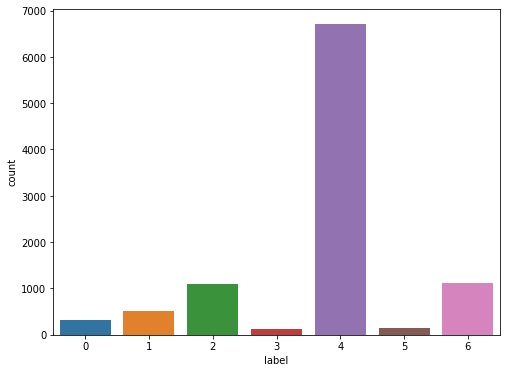

In [115]:
plt.figure(figsize = (8,6))
sns.countplot(Y.label)

In [116]:
label_mapping = {
    0: 'akiec',
    1: 'bcc',
    2: 'bkl',
    3: 'df',
    4: 'nv',
    5: 'vasc',
    6: 'mel'
}

In [117]:
#X = X / 255

#X

In [118]:
"""X = np.array(X)
X.shape"""

'X = np.array(X)\nX.shape'

In [119]:
# X = X.reshape(-1, 28, 28, 1)
# X.shape

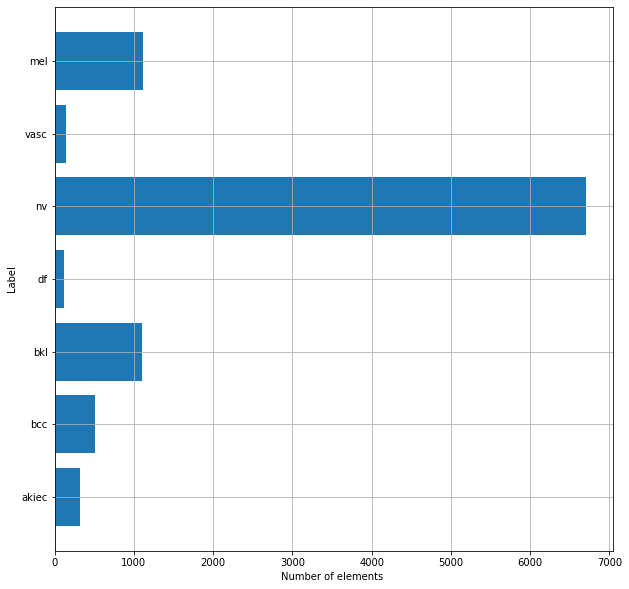

In [ ]:
y_int = np.int0(Y) 
count = np.zeros(7, dtype='int') #a vector of size 26 with all 0 values
for i in y_int:
    count[i] +=1 #total count of each label

labels = []
for i in label_mapping.values():
    labels.append(i) #all labels

fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(labels, count)

plt.xlabel("Number of elements ")
plt.ylabel("Label")
plt.grid()
plt.show()

In [122]:
# from sklearn.utils import shuffle
# import cv2
# shuff = shuffle(X[:100])

# fig, ax = plt.subplots(3,3, figsize = (10,10))
# axes = ax.flatten()

# for i in range(9):
#     _, shu = cv2.threshold(shuff[i], 30, 200, cv2.THRESH_BINARY)
#     axes[i].imshow(np.reshape(shuff[i], (28,28)), cmap="Greys")
# plt.show()

In [154]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=42)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


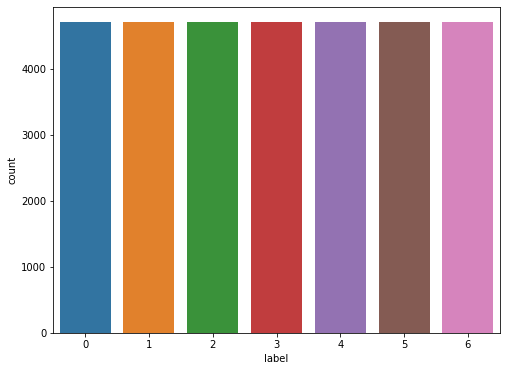

In [123]:
from imblearn.over_sampling import RandomOverSampler
sampler = RandomOverSampler()
X_train, Y_train = sampler.fit_resample(X_train, Y_train)

plt.figure(figsize = (8,6))
sns.countplot(Y_train.label)

In [159]:
X_train = np.array(X_train).reshape(-1,28,28,3)
X_test = np.array(X_test).reshape(-1,28,28,3)

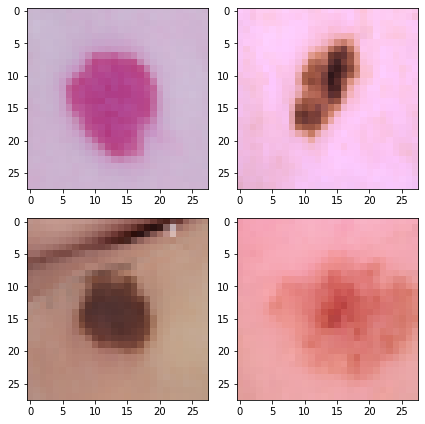

In [125]:
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(6, 6)
k = 0 
for i in range(2):
    for j in range(2):
        axes[i, j].imshow(X_train[k])
        k += 1
plt.tight_layout()

In [126]:
# Y_train = tf.keras.utils.to_categorical(Y_train)
# Y_test = tf.keras.utils.to_categorical(Y_test)

In [160]:
X_train.shape

(7010, 28, 28, 3)

In [161]:
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical
model = Sequential()
#CNN
# input -> conv -> maxpool -> conv -> maxpool ......->flattened vector-> 
#.                        hidden layer -> hidden layer -> softmax layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,3)))
model.add(MaxPool2D())

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D())

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D())

model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D())

model.add(Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding = 'same'))


model.add(Flatten())

model.add(Dense(128,activation ="relu"))
model.add(Dense(64,activation ="relu"))
model.add(Dense(32,activation ="relu"))
model.add(Dense(7,activation ="softmax"))

In [162]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_64 (Conv2D)          (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_53 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_65 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_54 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_66 (Conv2D)          (None, 6, 6, 128)         73856     
                                                                 
 max_pooling2d_55 (MaxPoolin  (None, 3, 3, 128)      

In [163]:
early_stop = EarlyStopping(patience=10, verbose=1, monitor='val_f1_m', mode='max')
reduce_lr =  ReduceLROnPlateau(monitor='val_f1_m', factor=0.1, patience=7, min_delta=1e-4, mode='max')

In [164]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


batch_size = 128
epochs = 10

history = model.fit(
    X_train,
    Y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs
)

Epoch 1/10
44/44 [==============================] - 30s 674ms/step - loss: 1.2006 - accuracy: 0.6428 - val_loss: 0.9131 - val_accuracy: 0.6819
Epoch 2/10
44/44 [==============================] - 29s 670ms/step - loss: 0.9076 - accuracy: 0.6769 - val_loss: 0.8366 - val_accuracy: 0.7033
Epoch 3/10
44/44 [==============================] - 29s 665ms/step - loss: 0.8751 - accuracy: 0.6965 - val_loss: 0.8115 - val_accuracy: 0.7026
Epoch 4/10
44/44 [==============================] - 29s 666ms/step - loss: 0.8406 - accuracy: 0.6976 - val_loss: 0.8209 - val_accuracy: 0.6947
Epoch 5/10
44/44 [==============================] - 29s 668ms/step - loss: 0.8178 - accuracy: 0.7035 - val_loss: 0.8373 - val_accuracy: 0.6912
Epoch 6/10
44/44 [==============================] - 29s 666ms/step - loss: 0.7831 - accuracy: 0.7101 - val_loss: 0.7515 - val_accuracy: 0.7190
Epoch 7/10
44/44 [==============================] - 29s 669ms/step - loss: 0.7412 - accuracy: 0.7241 - val_loss: 0.7539 - val_accuracy: 0.7233

In [169]:
model_acc = model.evaluate(X_test, Y_test, verbose=0)[1]

print("Test Accuracy: {:.0f}%".format(model_acc * 100))

Test Accuracy: 74%


In [170]:
y_true = np.array(Y_test)

y_pred = model.predict(X_test)
y_pred = np.array(list(map(lambda x: np.argmax(x), y_pred)))

In [166]:
cm = confusion_matrix(y_true, y_pred)
clr = classification_report(y_true, y_pred, target_names=label_mapping.values())

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


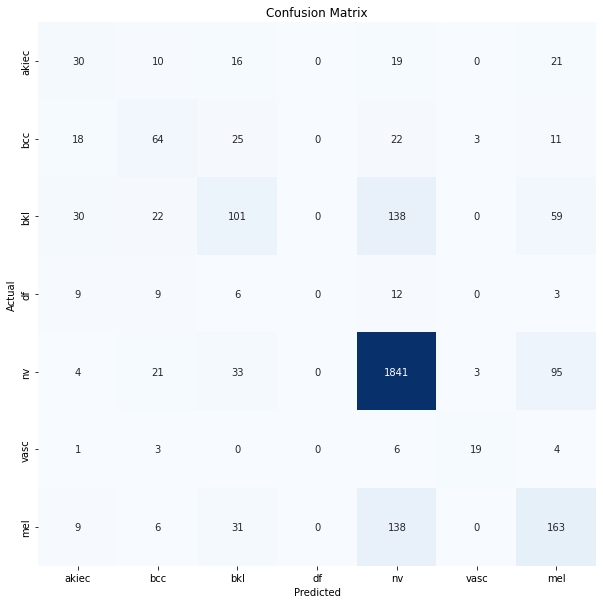

In [167]:
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cbar=False, cmap='Blues')

plt.xticks(np.arange(7) + 0.5, label_mapping.values())
plt.xlabel("Predicted")

plt.yticks(np.arange(7) + 0.5, label_mapping.values())
plt.ylabel("Actual")

plt.title("Confusion Matrix")

plt.show()

In [174]:
from PIL import Image, ImageOps
image = Image.open('/content/WhatsApp Image 2022-01-08 at 11.14.22 PM.jpeg')
#img = ImageOps.fit(img, (400,400), Image.ANTIALIAS)
img = np.asarray(img)
img_copy = cv2.GaussianBlur(img, (7,7), 0)
#img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(img_copy, 100, 255, cv2.THRESH_BINARY_INV)
img_final = cv2.resize(img_thresh, (28,28))
img_final =np.reshape(img_final, (1,28,28,3))
prediction = model.predict(img_final)
pred = label_mapping[np.argmax(prediction)]

In [175]:
print(pred)

nv


In [176]:
prediction

array([[4.5962326e-05, 4.0768544e-05, 8.1400938e-02, 9.8711171e-06,
        9.1140825e-01, 1.4386236e-08, 7.0941630e-03]], dtype=float32)

In [178]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model3.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp8s_mteo2/assets


INFO:tensorflow:Assets written to: /tmp/tmp8s_mteo2/assets


In [67]:
prediction.dtype


dtype('float32')

In [68]:
mobile = tf.keras.applications.mobilenet.MobileNet()
mobile.summary()

17235968/17225924 [==============================] - 0s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32

In [73]:
x = mobile.layers[-12].output #6th last layer 

In [74]:
output = Dense(units=7, activation='softmax')(x)

In [84]:
from tensorflow.keras.models import Model
model = Model(inputs=mobile.input, outputs=output)

In [85]:
for layer in model.layers[:-28]:
    layer.trainable = False

In [86]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [90]:
refinedmodel = Sequential()
refinedmodel.add(Input(shape=(3,224,224))
refinedmodel.add(Reshape(1,28,28))
refinedmodel.add(model)

SyntaxError: ignored